In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_url = 'https://raw.githubusercontent.com/deadex-ng/Task-2/main/cleaned_fintech_data.csv'
#load csv file 

In [19]:
df = pd.read_csv(data_url)
#print(df.head())

In [20]:
for col in df.columns:
  print(col)
  #Diplay column names 

Unnamed: 0
created_at
source
original_text
clean_text
sentiment
polarity
subjectivity
lang
favorite_count
retweet_count
original_author
screen_count
followers_count
friends_count
possibly_sensitive
hashtags
user_mentions
place
place_coord_boundaries
timestamp


In [21]:
def text_category(p):
  if p < 0.0:
    return 'negative'
  elif p == 0:
    return 'neutral'
  else:
    return 'positive'

In [22]:
#Create a sub dataset
cleanTweet = df[["clean_text","polarity"]]
 
#Check the first 10 rows
cleanTweet.head()


,clean_text,polarity
0,Giving forth life becoming burden Kenya This m...,0.3194444444444445
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.0
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.0
3,Today World Day Combat Restoring degraded land...,0.25
4,Hearing say 's confident vaccines delivered li...,0.5


In [23]:
cleanTweet['score'] = pd.to_numeric(cleanTweet["polarity"], errors='coerce').apply(text_category)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
cleanTweet.head()

,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.3194444444444445,positive
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.0,neutral
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.0,neutral
3,Today World Day Combat Restoring degraded land...,0.25,positive
4,Hearing say 's confident vaccines delivered li...,0.5,positive


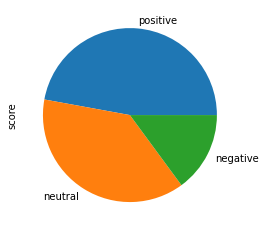

In [25]:
#Data visualization in pie chart
cleanTweet['score'].value_counts().plot(kind='pie')

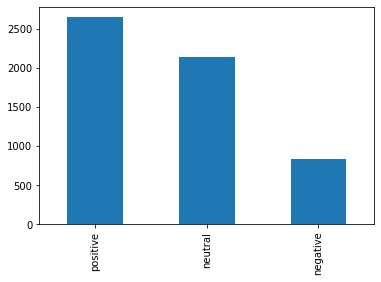

In [26]:
#data visualization in bar chart
cleanTweet['score'].value_counts().plot(kind='bar')

In [27]:
#get names of indexes for which colomn name polarity has value 0 
index_names = cleanTweet [ cleanTweet['score'] == 'neutral' ].index

#drop the rows 
cleanTweet.drop(index_names, inplace= True)

#reset the index 
cleanTweet = cleanTweet.reset_index()

#check
#cleanTweet.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
#gets value of score as argument and return scoremap value
def score_map_function(score):
  if score == 'positive':
    return 1 
  else:
    return 0


In [29]:
#passing values of score to score_map_function
cleanTweet['scoremap'] = cleanTweet['score'].apply(score_map_function)

#checking the new dataset
cleanTweet.head()

,index,clean_text,polarity,score,scoremap
0,0,Giving forth life becoming burden Kenya This m...,0.3194444444444445,positive,1
1,3,Today World Day Combat Restoring degraded land...,0.25,positive,1
2,4,Hearing say 's confident vaccines delivered li...,0.5,positive,1
3,6,Today World Day Combat Restoring degraded land...,0.25,positive,1
4,9,Austria `` right '' grid tariffs regulatory re...,0.2857142857142857,positive,1


In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer #for turning text to numeric data
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices

In [31]:
#creating a trigram using CountVectorizer
trigram_vectorizer = CountVectorizer(ngram_range=(1, 3))
trigram_vectorizer.fit(cleanTweet['clean_text'].values)

dump(trigram_vectorizer, 'trigram_vectorizer.joblib')

['trigram_vectorizer.joblib']

In [32]:
X_train_trigram = trigram_vectorizer.transform(cleanTweet['clean_text'].values)

save_npz('X_train_trigram.npz', X_train_trigram)

In [33]:
#creating a trigram using Tf-Idf
trigram_tf_idf_transformer = TfidfTransformer()
trigram_tf_idf_transformer.fit(X_train_trigram)

dump(trigram_tf_idf_transformer, 'trigram_tf_idf_transformer.joblib')

['trigram_tf_idf_transformer.joblib']

In [34]:
X_train_trigram_tf_idf = trigram_tf_idf_transformer.transform(X_train_trigram)

save_npz('X_train_trigram_tf_idf.npz', X_train_trigram_tf_idf)

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import numpy as np

In [36]:
def train_and_show_scores(X: csr_matrix,y:np.array,title: str) -> None:
  X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=0.75, stratify=y
    )
  
  clf = SGDClassifier()
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  valid_score = clf.score(X_valid, y_valid)
  print(f'{title}\nTrain score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')


In [37]:
#creating feature and target variables 
y_train = cleanTweet['scoremap'].values 


In [38]:
train_and_show_scores(X_train_trigram, y_train, 'Trigram Counts')
train_and_show_scores(X_train_trigram_tf_idf, y_train, 'Trigram Tf-Idf')

Trigram Counts
Train score: 1.0 ; Validation score: 0.99

Trigram Tf-Idf
Train score: 1.0 ; Validation score: 0.99

